In [1]:
import sympy as sp
import control
import matplotlib.pyplot as plt

from sympy.abc import x, t
# k, b, m = sp.symbols('k b m', real=True, positive=True)

# Exact discretization of C.T system

## Define C.T matrices and sampling time

In [7]:
k = 1.0
b = 0.5
m = 1.0
T_s = 0.05

A_c = sp.Matrix([[0 , 1], [-k/m ,-b/m]])
B_c = sp.Matrix([0, 1/m])
C_c = sp.Matrix([1, 0]).transpose()
D_c = sp.Matrix([0])

T_s = 0.05

## Stack matrices and compute matrix exponential

In [8]:
M = sp.Matrix.vstack(
    sp.Matrix.hstack(A_c, B_c),
    sp.Matrix.hstack(sp.zeros(1,A_c.shape[1]), sp.zeros(1,B_c.shape[1]))
)

# compute matrix exponential
F = sp.simplify(sp.exp(M*T_s))

## Print discrete time matrices

In [11]:
A_d = F[0:2, 0:2]
B_d = F[0:2, 2]
C_d = C_c
D_d = D_c

print('A_d: \n')
sp.pprint(A_d)
print('B_d: \n')
sp.pprint(B_d)
print('C_d: \n')
sp.pprint(C_d)
print('D_d: \n')
sp.pprint(D_d)

A_d: 

⎡ 0.998760609693899   0.0493596036560382⎤
⎢                                       ⎥
⎣-0.0493596036560382   0.97408080786588 ⎦
B_d: 

⎡0.00123939030610126⎤
⎢                   ⎥
⎣0.0493596036560382 ⎦
C_d: 

[1  0]
D_d: 

[0]


#  Continuous time simulation

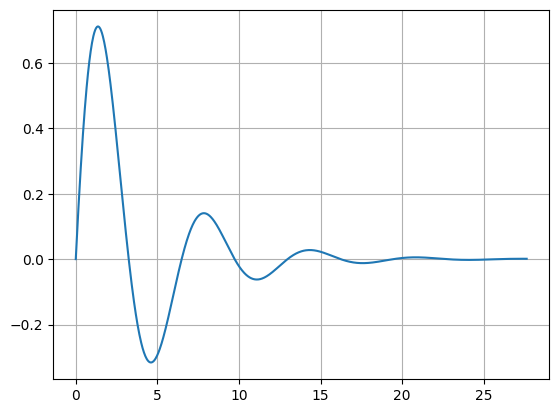

In [12]:
sys_ct = control.ss( A_c, B_c, C_c, D_c)
T, yout = control.impulse_response(sys_ct, T_num = 1000)
plt.plot(T.T, yout.T)
plt.grid()
plt.show(block=False)

## Discrete time simulation

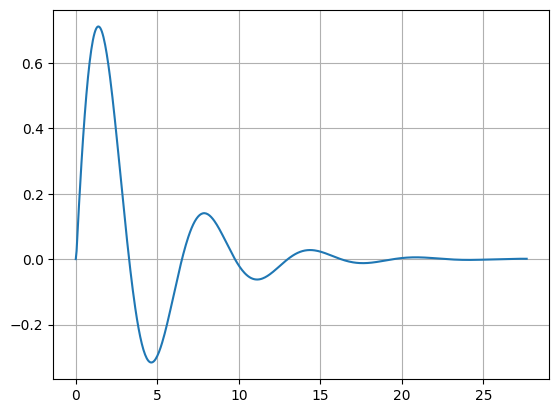

In [13]:
sys_dt = control.ss( A_d, B_d, C_d, D_d, dt=0.05)
T, yout = control.impulse_response(sys_dt)
plt.plot(T.T, yout.T)
plt.grid()
plt.show(block=False)

## Convert C.T system to D.T system using library function

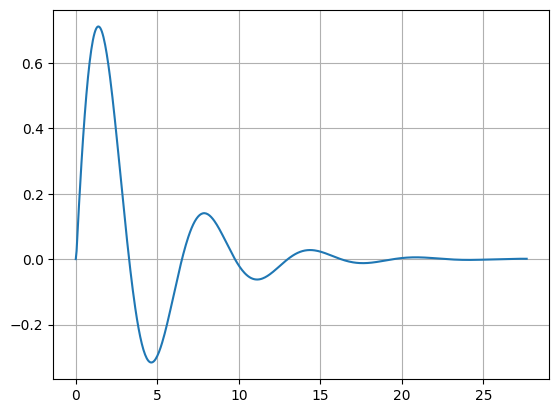

In [14]:
sys_dt = control.sample_system(sys_ct,  Ts=0.05, method='zoh')
T, yout = control.impulse_response(sys_dt)
plt.plot(T.T, yout.T)
plt.grid()
plt.show(block=False)